In [1]:
from anisotropy.core.database import Database, Structure
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn
import numpy

In [2]:
db = Database("anisotropy", "woPrismaticLayer")
db.setup()

In [3]:
res = db.search([Structure.type == "simple", Structure.direction == str([1.0, 0.0, 0.0])])
df = DataFrame(res)

In [4]:
df_keys = [ key for key in df.keys() ]

<AxesSubplot:>

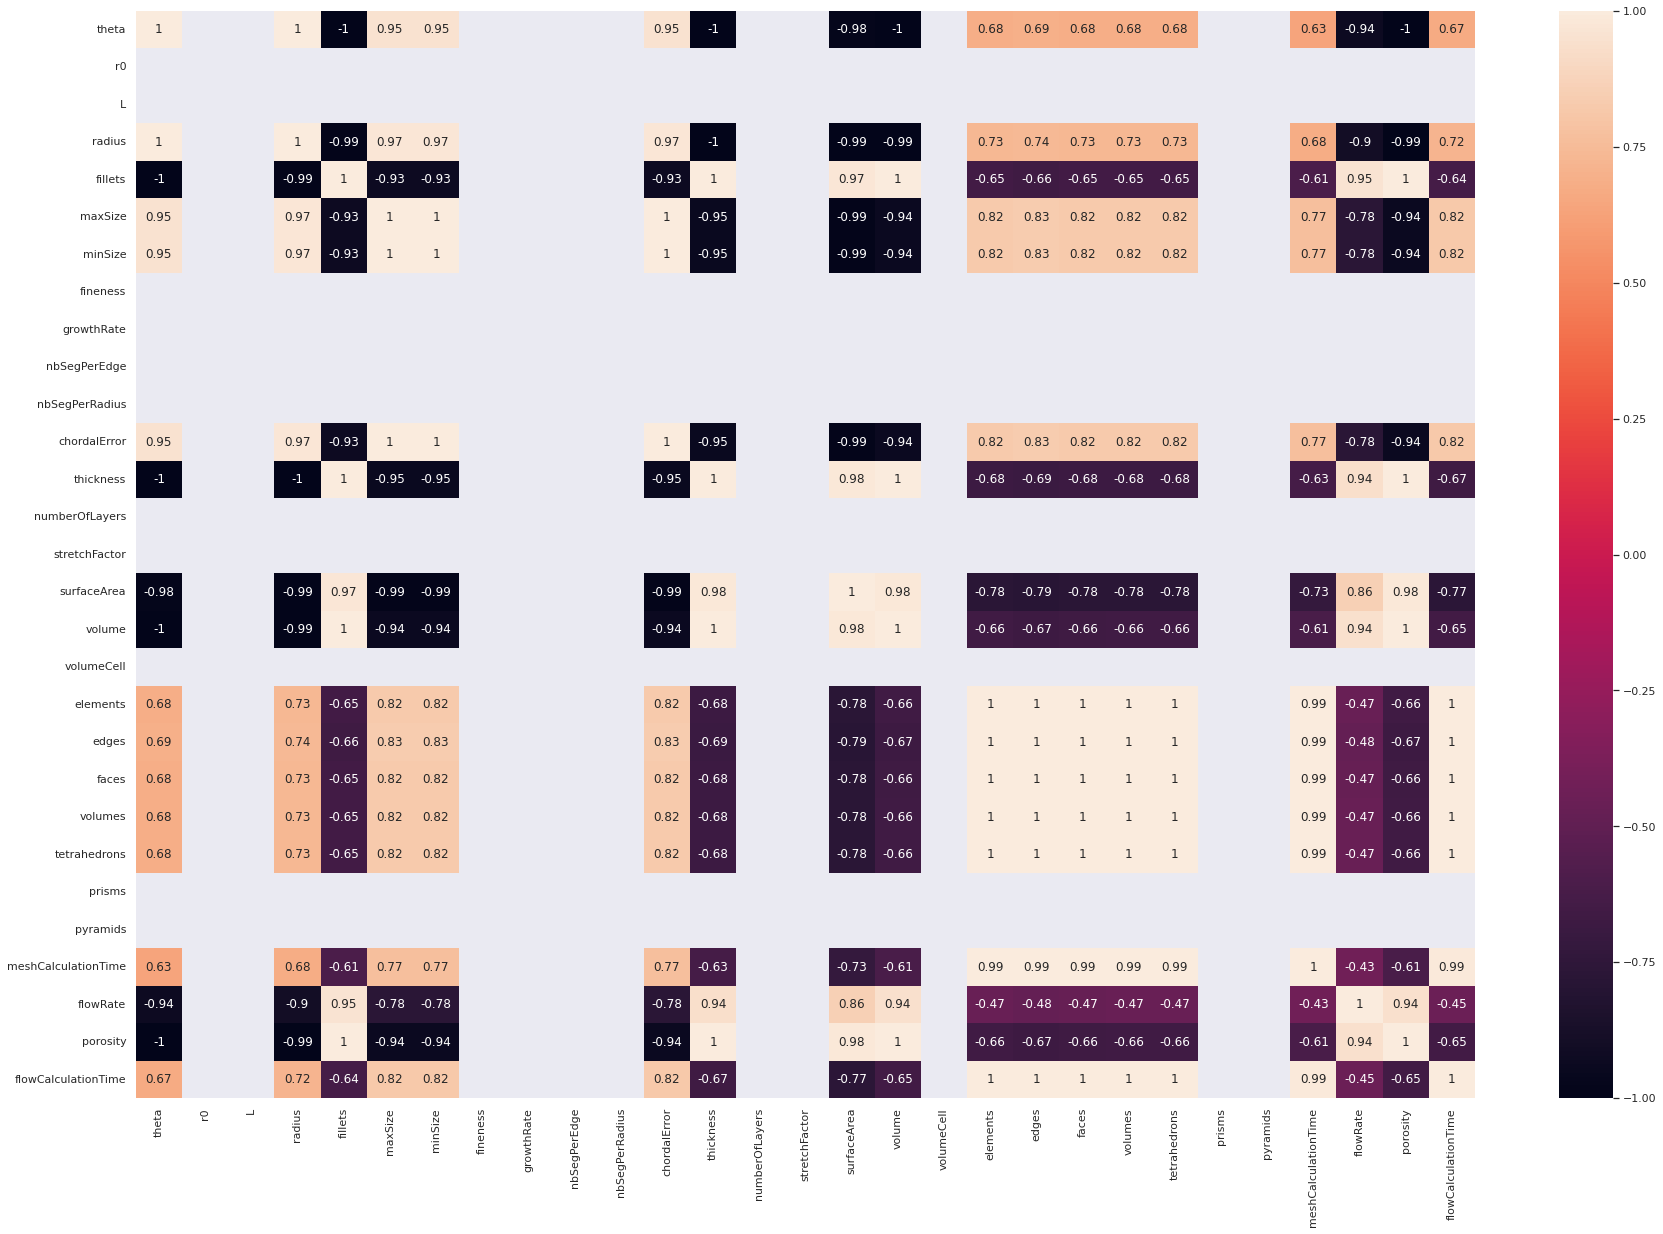

In [18]:
df_numeric = df[[
    col for col in df.columns 
        if not isinstance(df[col][0], str) 
            and not isinstance(df[col][0], numpy.bool_)
            and not isinstance(df[col][0], dict)
            and not col[-3: ] == "_id"
]]
seaborn.set(rc = { "figure.figsize": (30, 20) })
seaborn.heatmap(df_numeric.corr(), annot = True)